<a href="https://colab.research.google.com/github/Mansi67/Web_Scraping_Jobs/blob/main/LinkedIn_Webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






# LinkedIn Jobs

#### I utilized Python's BeautifulSoup library to scrape a dataset from LinkedIn. Specifically, I filtered jobs by specifying India as the country and the job title as "data scientist." Each page contained 25 job listings, and I collected data from 10 continuous pages for this particular project. So, the dataset contains 1250 recent job listings.
Date of collection: 11/12/2023

#### I've managed to gather information through web scraping that includes the company names, job titles, job locations, types of employment, industries, seniority levels, and job functions.


In [ ]:
!pip install requests
!pip install beautifulsoup4

In [6]:
import requests
from bs4 import BeautifulSoup
import math
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
l=[]
k=[]
o={}
target_url='https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=data%20scientist&location=India&geoId=102713980&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&currentJobId=3761864489&start={}'
for i in range(0,50): #50 pages
    res = requests.get(target_url.format(i))
    soup=BeautifulSoup(res.text,'html.parser')
    alljobs_on_this_page=soup.find_all("li")
    print(len(alljobs_on_this_page)) #Each containing 25 jobs
    for x in range(0,len(alljobs_on_this_page)):
        jobid = alljobs_on_this_page[x].find("div",{"class":"base-card"}).get('data-entity-urn').split(":")[3]
        l.append(jobid)
target_url='https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/{}'
for j in range(0,len(l)):
    resp = requests.get(target_url.format(l[j]))
    soup=BeautifulSoup(resp.text,'html.parser')
    try:
        o["Company"]=soup.find("div",{"class":"top-card-layout__card"}).find("a").find("img").get('alt')
        # soup.find("span",{"class": "topcard__flavor"}).find("a").text.strip()
    except:
        o["Company"]=None
    try:
        o["Job-title"]=soup.find("div",{"class":"top-card-layout__entity-info"}).find("a").text.strip()
    except:
        o["Job-title"]=None
    try:
      o['Location']=soup.find("span",{"class" :"topcard__flavor topcard__flavor--bullet"}).text.strip()
    except:
      o['Location']=None
    try:
        o["Seniority-Level"]=soup.find("ul",{"class":"description__job-criteria-list"}).find_all("li")[0].find("span").text.strip()
        # text.replace("Seniority level","").strip()
    except:
        o["Seniority-Level"]=None
    try:
         o["Employment-Type"]=soup.find("ul",{"class":"description__job-criteria-list"}).find_all("li")[1].find("span").text.strip()
    except:
         o["Employment-Type"]=None
    try:
         o["Job-Function"]=soup.find("ul",{"class":"description__job-criteria-list"}).find_all("li")[2].find("span").text.strip()
    except:
         o["Job-Function"]=None
    try:
         o["Industry"]=soup.find("ul",{"class":"description__job-criteria-list"}).find_all("li")[3].find("span").text.strip()
    except:
         o["Industry"]=None

    k.append(o)
    o={}
    # Add a random delay between 1 to 5 seconds
    delay = random.uniform(1, 10)
    time.sleep(delay)

25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25


In [ ]:
df = pd.DataFrame(k)

In [ ]:
df

,Company,Job-title,Location,Seniority-Level,Employment-Type,Job-Function,Industry
0,Experfy,AI/ML Data Scientist,"Bengaluru, Karnataka, India",Mid-Senior level,Full-time,Engineering and Information Technology,"Technology, Information and Internet"
1,XenonStack,ML Engineer,"Sahibzada Ajit Singh Nagar, Punjab, India",Entry level,Full-time,"Information Technology, Analyst, and Engineering","IT Services and IT Consulting, Software Develo..."
2,Tamcherry - Zaportiv,AI/ML Developer,"Bangalore Urban, Karnataka, India",Mid-Senior level,Full-time,Engineering and Information Technology,Information Technology & Services
3,Trexquant Investment LP,Data Scientist (INDIA),"Gurugram, Haryana, India",Associate,Full-time,Research,"Technology, Information and Internet"
4,"Dubai Jobs, Gulf Jobs, Jobs in Dubai, Qatar, K...",MACHINE LEARNING AI PLATFORM ENGINEER,"Bangalore Urban, Karnataka, India",Entry level,Full-time,Engineering and Information Technology,Staffing and Recruiting
...,...,...,...,...,...,...,...
1245,Adani Group,Data Science - AI Solutions Expert,"Kolkata, West Bengal, India",Mid-Senior level,Full-time,Other,Utilities
1246,LSEG (London Stock Exchange Group),Data Scientist,"Bengaluru East, Karnataka, India",Associate,Full-time,Engineering and Information Technology,IT Services and IT Consulting and Financial Se...
1247,Fractal,Data Scientist/ Senior Data Scientist- NLP GenAI,"Bengaluru, Karnataka, India",Mid-Senior level,Full-time,Engineering and Information Technology,Business Consulting and Services
1248,XenonStack,ML Engineer,"Sahibzada Ajit Singh Nagar, Punjab, India",Entry level,Full-time,"Information Technology, Analyst, and Engineering","IT Services and IT Consulting, Software Develo..."


In [ ]:
df.tail(5)

,Company,Job-title,Location,Seniority-Level,Employment-Type,Job-Function,Industry
1245,Adani Group,Data Science - AI Solutions Expert,"Kolkata, West Bengal, India",Mid-Senior level,Full-time,Other,Utilities
1246,LSEG (London Stock Exchange Group),Data Scientist,"Bengaluru East, Karnataka, India",Associate,Full-time,Engineering and Information Technology,IT Services and IT Consulting and Financial Se...
1247,Fractal,Data Scientist/ Senior Data Scientist- NLP GenAI,"Bengaluru, Karnataka, India",Mid-Senior level,Full-time,Engineering and Information Technology,Business Consulting and Services
1248,XenonStack,ML Engineer,"Sahibzada Ajit Singh Nagar, Punjab, India",Entry level,Full-time,"Information Technology, Analyst, and Engineering","IT Services and IT Consulting, Software Develo..."
1249,IBM,Data Scientist,"Bengaluru East, Karnataka, India",Not Applicable,Full-time,Information Technology,Computer Hardware Manufacturing


In [4]:
# df.to_csv('newframe1.csv', index=True)#1250 rows

# EDA

In [7]:
# Importing dataset
jobs_df=pd.read_csv("/content/Linkedin_jobs1000.csv")
jobs_df=jobs_df.iloc[:,1:] # Filtering index column
jobs_df.head()

,Company,Job-title,Location,Seniority-Level,Employment-Type,Job-Function,Industry
0,Experfy,AI/ML Data Scientist,"Bengaluru, Karnataka, India",Mid-Senior level,Full-time,Engineering and Information Technology,"Technology, Information and Internet"
1,XenonStack,ML Engineer,"Sahibzada Ajit Singh Nagar, Punjab, India",Entry level,Full-time,"Information Technology, Analyst, and Engineering","IT Services and IT Consulting, Software Develo..."
2,Tamcherry - Zaportiv,AI/ML Developer,"Bangalore Urban, Karnataka, India",Mid-Senior level,Full-time,Engineering and Information Technology,Information Technology & Services
3,Trexquant Investment LP,Data Scientist (INDIA),"Gurugram, Haryana, India",Associate,Full-time,Research,"Technology, Information and Internet"
4,"Dubai Jobs, Gulf Jobs, Jobs in Dubai, Qatar, K...",MACHINE LEARNING AI PLATFORM ENGINEER,"Bangalore Urban, Karnataka, India",Entry level,Full-time,Engineering and Information Technology,Staffing and Recruiting


In [8]:
print("Shape of dataset:", jobs_df.shape)

Shape of dataset: (1250, 7)


There are 1250 rows and 7 columns in the dataset

In [9]:
print("Column names:\n", jobs_df.columns)

Column names:
 Index(['Company', 'Job-title', 'Location', 'Seniority-Level',
       'Employment-Type', 'Job-Function', 'Industry'],
      dtype='object')


In [10]:
print("Info:")
print(jobs_df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          1250 non-null   object
 1   Job-title        1250 non-null   object
 2   Location         1250 non-null   object
 3   Seniority-Level  1250 non-null   object
 4   Employment-Type  1220 non-null   object
 5   Job-Function     1220 non-null   object
 6   Industry         1220 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB
None


There are null values in the dataset in columns- 4,5 and 6.

In [12]:
print ("Number of unique companies :", jobs_df['Company'].nunique())

Number of unique companies : 130


In [11]:
print ("Types of Employment: ", jobs_df['Employment-Type'].dropna().unique())

Types of Employment:  ['Full-time' 'Contract']


In [13]:
print ("Levels of Seniority in available jobs\n", jobs_df['Seniority-Level'].unique())

Levels of Seniority in available jobs
 ['Mid-Senior level' 'Entry level' 'Associate' 'Not Applicable'
 'Internship' 'Full-time' 'Director' 'Executive']


In [14]:
print("Types of industries:\n", jobs_df['Industry'].nunique())

Types of industries:
 55


In [15]:
print ("Job Function:\n", jobs_df['Job-Function'].unique())

Job Function:
 ['Engineering and Information Technology'
 'Information Technology, Analyst, and Engineering' 'Research' 'Analyst'
 'Information Technology' 'Other'
 'Research, Analyst, and Information Technology' 'Engineering'
 'Analyst and Research' 'Engineering, Information Technology, and Analyst'
 nan 'General Business, Strategy/Planning, and Consulting'
 'Information Technology and Engineering' 'Sales'
 'Project Management, Other, and Information Technology' 'Production'
 'Science, Research, and Other' 'Consulting and Information Technology'
 'Design and Information Technology' 'Finance' 'Education']


In [16]:
# Renaming job titles in title case
jobs_df['Job-title'] = jobs_df['Job-title'].apply(lambda x: x.title())

In [17]:
jobs_df['City']=jobs_df['Location'].apply(lambda x: x.split(",")[0])

In [18]:
jobs_df['City'].unique()

array(['Bengaluru', 'Sahibzada Ajit Singh Nagar', 'Bangalore Urban',
       'Gurugram', 'Pune', 'Hyderabad', 'Gurgaon',
       'Mumbai Metropolitan Region', 'Chennai', 'Mumbai', 'Trivandrum',
       'Noida', 'Pune/Pimpri-Chinchwad Area', 'Delhi', 'Maharashtra',
       'Bengaluru East', 'Greater Bengaluru Area', 'Kolkata',
       'Peerancheru', 'Kanayannur', 'India', 'Jaipur', 'Kochi', 'Panaji',
       'Greater Gwalior Area', 'Lucknow', 'Ahmedabad', 'Gwalior', 'Dadri',
       'Bhubaneswar', 'Greater Kolkata Area', 'Bengaluru North'],
      dtype=object)

In [ ]:
# jobs_df['City'].value_counts()

In [19]:
#Renaming cities
def rename(x):
  if x in ("Bengaluru","Bangalore Urban","Bengaluru East", "Greater Bengaluru Area", "Bengaluru North"):
    x="Bengaluru"
  elif x in ("Gurugram", "Gurgaon",):
    x="Gurugram"
  elif x in ("Pune", "Pune/Pimpri-Chinchwad Area"):
    x="Pune"
  elif x in ("Mumbai Metropolitan Region", "Mumbai"):
    x="Mumbai"
  elif x in ("Kolkata","Greater Kolkata Area"):
    x="Kolkata"
  elif x in ("Greater Gwalior Area","Gwalior"):
    x="Gwalior"
  elif x in ("India", "Maharashtra"):
    x="Anywhere"
  return x

In [20]:
jobs_df["City"]=jobs_df["City"].apply(rename)

In [21]:
jobs_df["City"].unique()

array(['Bengaluru', 'Sahibzada Ajit Singh Nagar', 'Gurugram', 'Pune',
       'Hyderabad', 'Mumbai', 'Chennai', 'Trivandrum', 'Noida', 'Delhi',
       'Anywhere', 'Kolkata', 'Peerancheru', 'Kanayannur', 'Jaipur',
       'Kochi', 'Panaji', 'Gwalior', 'Lucknow', 'Ahmedabad', 'Dadri',
       'Bhubaneswar'], dtype=object)

# Top locations for Data Scientist Jobs

In [22]:
data=jobs_df[jobs_df["City"]!="Anywhere"]["City"].value_counts().reset_index()
data.columns=['City','Jobs']


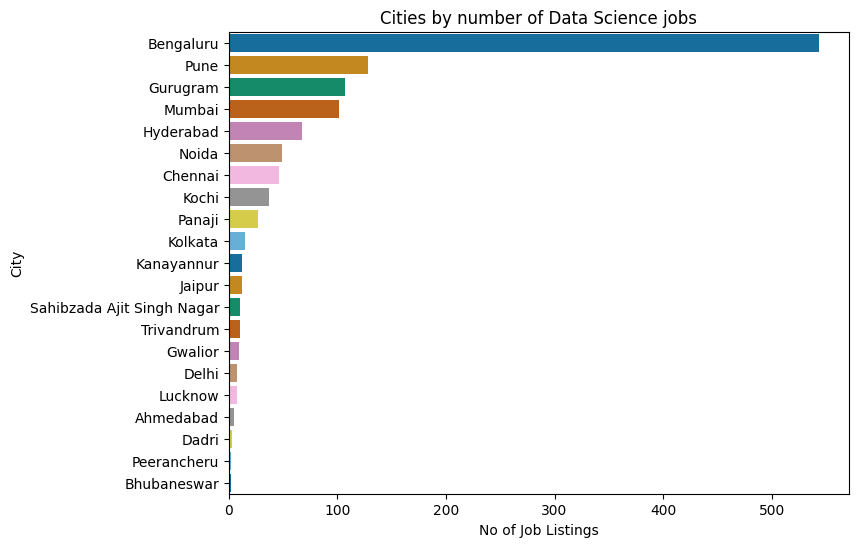

In [27]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(y='City', x='Jobs', data=data, palette='colorblind', orient='h')

# Adding labels and title
plt.ylabel('City')
plt.xlabel('No of Job Listings')
plt.title('Cities by number of Data Science jobs')

# Show plot
plt.show()

In [24]:
data["% share"]=round(100*data["Jobs"]/1250, 2)

In [25]:
data.head()

,City,Jobs,% share
0,Bengaluru,544,43.52
1,Pune,128,10.24
2,Gurugram,107,8.56
3,Mumbai,101,8.08
4,Hyderabad,67,5.36


## Insights:
Of the total 1250 job listings, Bengaluru accounts for 43%, making it the city with the highest number of Data Science jobs, followed by Pune, which comprises 10% of the listings, and Gurugram with 8.5% of the total jobs.

# Companies actively hiring for Data Scientists

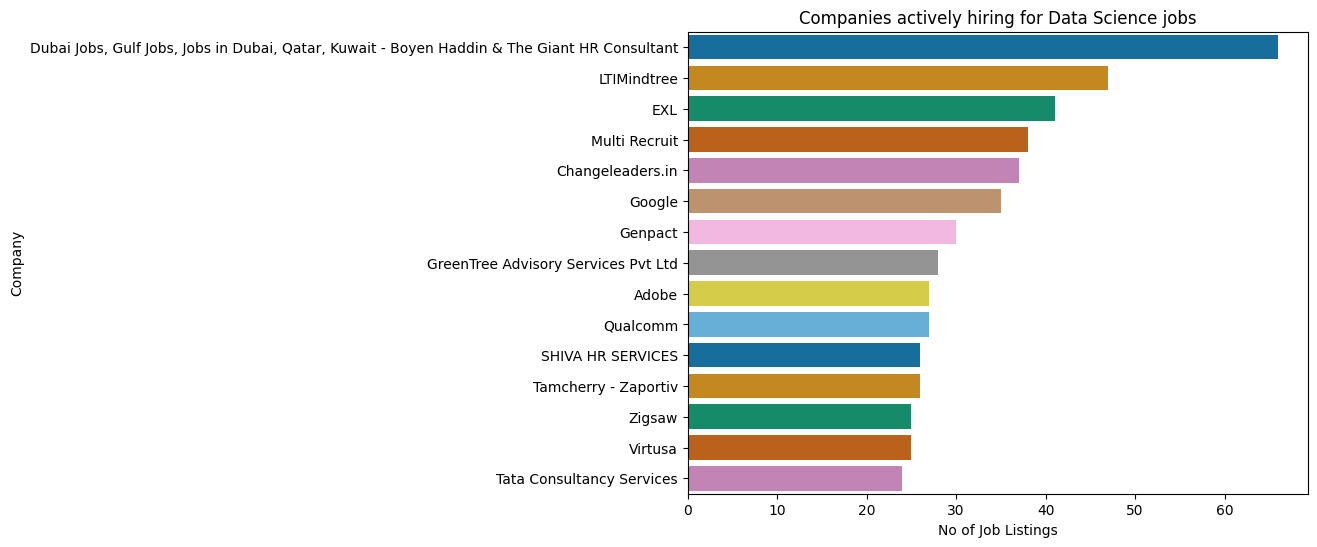

In [28]:
data=jobs_df['Company'].value_counts()[:15].reset_index()
data.columns=['Company','Jobs']

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(y='Company', x='Jobs', data=data, palette='colorblind', orient='h')

# Adding labels and title
plt.ylabel('Company')
plt.xlabel('No of Job Listings')
plt.title('Companies actively hiring for Data Science jobs')

# Show plot
plt.show()


## Insights

The above mentioned companies have listed most number of vacancies in recent times.

Boyen Haddin & The Giant HR Consultant has came out with 66 jobs followed by LTIMIndtree and EXL.
IT giants like Google, TCS, Genpact are also listed many job posts.

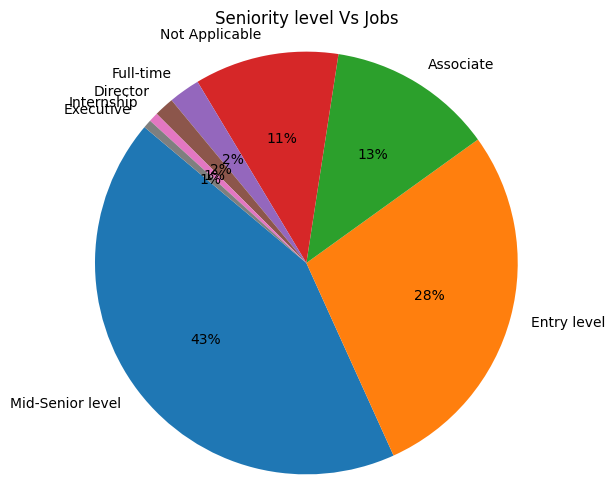

In [45]:
data=jobs_df['Seniority-Level'].value_counts().reset_index()
data.columns=['Seniority-Level', 'Count']


# Creating the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(data['Count'], labels=data['Seniority-Level'], autopct='%1.0f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Optional: Add a title
plt.title('Seniority level Vs Jobs')

# Show the pie chart
plt.show()

## Insights

Most of the jobs posted are either for mid-senior level or entry-level posts.

# Employment type

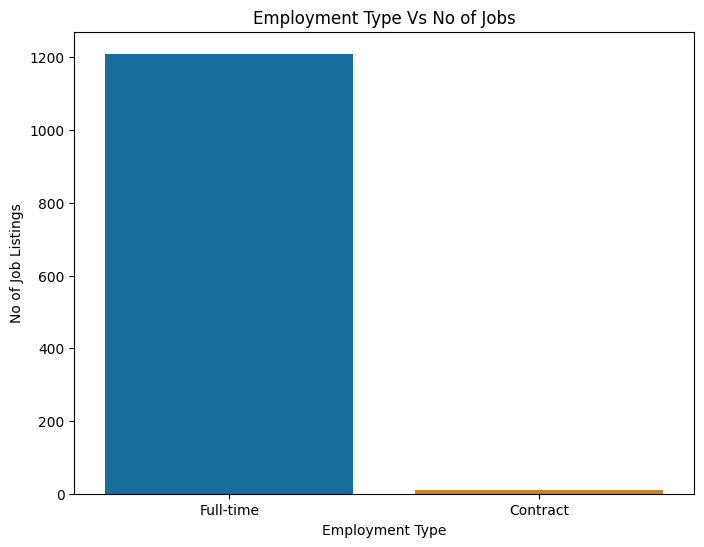

In [36]:
data=jobs_df['Employment-Type'].value_counts().reset_index()
data.columns=['Type', 'Count']

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(y='Count', x='Type', data=data, palette='colorblind')

# Adding labels and title
plt.xlabel('Employment Type')
plt.ylabel('No of Job Listings')
plt.title('Employment Type Vs No of Jobs')

# Show plot
plt.show()


## Insights

It is quite evident from the graph that mostly Full Time opportunities are present in Data Science in India.

# Job Function Vs No of roles

In [37]:
jobs_df['Job-Function'].value_counts()

Engineering and Information Technology                   664
Information Technology                                   268
Other                                                     57
Engineering                                               39
Analyst                                                   32
Information Technology and Engineering                    23
Information Technology, Analyst, and Engineering          21
Research, Analyst, and Information Technology             17
Research                                                  16
General Business, Strategy/Planning, and Consulting       13
Science, Research, and Other                              12
Consulting and Information Technology                     11
Engineering, Information Technology, and Analyst           9
Project Management, Other, and Information Technology      8
Design and Information Technology                          7
Finance                                                    7
Analyst and Research    

In [55]:
def redefine_categories(x):
  l1=('Engineering and Information Technology','Information Technology','Engineering', 'Information Technology and Engineering',
      'Information Technology, Analyst, and Engineering','Engineering, Information Technology, and Analyst','Project Management, Other, and Information Technology',
      'Design and Information Technology')
  l2=('Analyst', 'Research, Analyst, and Information Technology','Research','Science, Research, and Other','Analyst and Research')
  l3=('General Business, Strategy/Planning, and Consulting','Consulting and Information Technology')
  l4=('Finance','Sales', 'Production','Education')

  if x in l1:
    x='Engineering and Technology'
  elif x in l2:
    x='Research and Analysis'
  elif x in l3:
    x='Consulting and Business Strategy'
  elif x in l4:
    x='Sales/Production/Education/Finance'
  return x


In [57]:
jobs_df['Job-Function-Category']= jobs_df['Job-Function'].apply(redefine_categories)


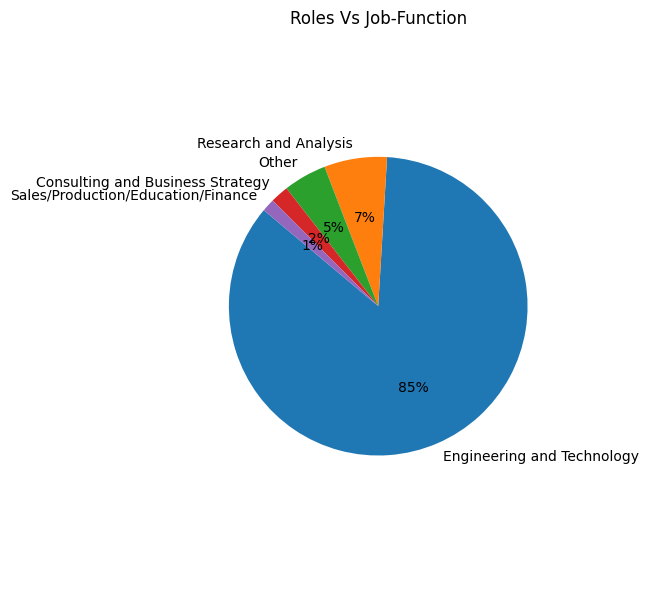

In [59]:
data=jobs_df['Job-Function-Category'].value_counts().reset_index()
data.columns=['Category','Jobs']

# Creating the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(data['Jobs'], labels=data['Category'], autopct='%1.0f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Optional: Add a title
plt.title('Roles Vs Job-Function')


plt.tight_layout()
# Show the pie chart
plt.show()

## Insight

The chart clearly indicates that Information Technology and Engineering-related roles seem to constitute a significant portion.